## Banana Quality Prediction

This notebook, will help us predict the quality of banans using various features like ripenss, sugar content, firmness, etc...



### Data Loading

Load the data from `banana_quality_dataset.csv` into a pandas DataFrame, and show the first few records.

In [1]:
import pandas as pd

data = pd.read_csv('./banana_quality_dataset.csv')
data.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


### Data Engineering

Show the columns and their data types.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

Check if there are any null values in the dataset by displaying the columns and the number of nulls next to them.

In [3]:
data.isnull().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

Convert the column `harvest_date` to a datetime datatype using pandas.

In [4]:
data['harvest_date'] = pd.to_datetime(data['harvest_date'])

Extract the following from `harvest_date` and store them in a new column as specified:
- Day store it in `harvest_day`
- Day of the week store it in `harvest_day_of_week`
- Week Number store it in `harvest_week`

Since you've convert it to datetime, you can use the accessor `dt`.

In [5]:
data['harvest_day'] =  data['harvest_date'].dt.day
data['harvest_day_of_week'] =  data['harvest_date'].dt.dayofweek
data['harvest_week'] =  data['harvest_date'].dt.isocalendar().week

data.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm,harvest_day,harvest_day_of_week,harvest_week
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6,16,0,42
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8,14,5,41
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7,8,4,36
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8,7,5,40
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7,2,0,40


Remove the columns `sample_id` and `harvest_date` since these are not needed.

In [6]:
data.drop(['sample_id', 'harvest_date'], axis=1, inplace=True)

Create two lists `categoric_features` and `numeric_features`. Programmatically store columns names in the respective list. After doing this process remove `quality_score` from the list, and store in a new variable named `target`.

In [7]:
categoric_features = []
numeric_features = []
 
for col in data:
    if data[col].dtype == 'object':
        categoric_features.append(col)
    else:
        numeric_features.append(col)
 
target = 'quality_score'
numeric_features.remove(target)
 
print(categoric_features)
print(numeric_features)
print(target)

['variety', 'region', 'quality_category', 'ripeness_category']
['ripeness_index', 'sugar_content_brix', 'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m', 'rainfall_mm', 'soil_nitrogen_ppm', 'harvest_day', 'harvest_day_of_week', 'harvest_week']
quality_score


### Data Exploration

Create a `seaborn` pairplot on the numeric features against the target.

Is there any obvious indication related to `quality_score` based on these features?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(12,6))
 
sns.pairplot(data, x_vars=numeric_features, y_vars=target, kind='scatter')
plt.show()

NameError: name 'data' is not defined

<Figure size 1200x600 with 0 Axes>

Answer: It seems that `quality_score` is directed affected by `ripeness_index`, `sugar_content_brix` and `length_cm`.

Create another `seaborn` pairplot this time on the categoric features against the target.

Any observations on this plot?

<Figure size 1200x600 with 0 Axes>

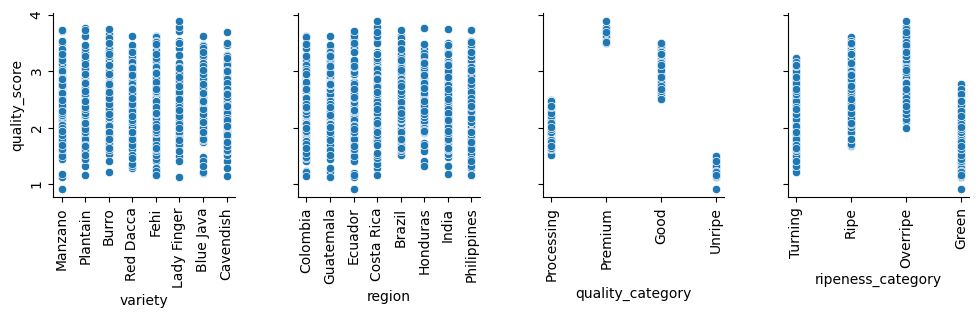

In [9]:
plt.figure(figsize=(12,6))
 
g = sns.pairplot(data, x_vars=categoric_features, y_vars=target, kind='scatter')
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)
plt.show()

Answer: It seems that `quality_category` is a label alternative to `quality_score`. Ideally it must be removed since it will bias machine learning. `ripeness_category` seems to affect `quality_score` as well and possibly it can be removed.

Since `quality_category` is an alternative to `qaulity_score`, we should remove it. Remove it from the dataset, and from the appropriate feature list.

In [10]:
data.drop(['quality_category'], axis=1, inplace=True)
categoric_features.remove('quality_category')

Create a correlation heatmap based on the numeric features but also including the target.

Any observations on which feature affects the target?

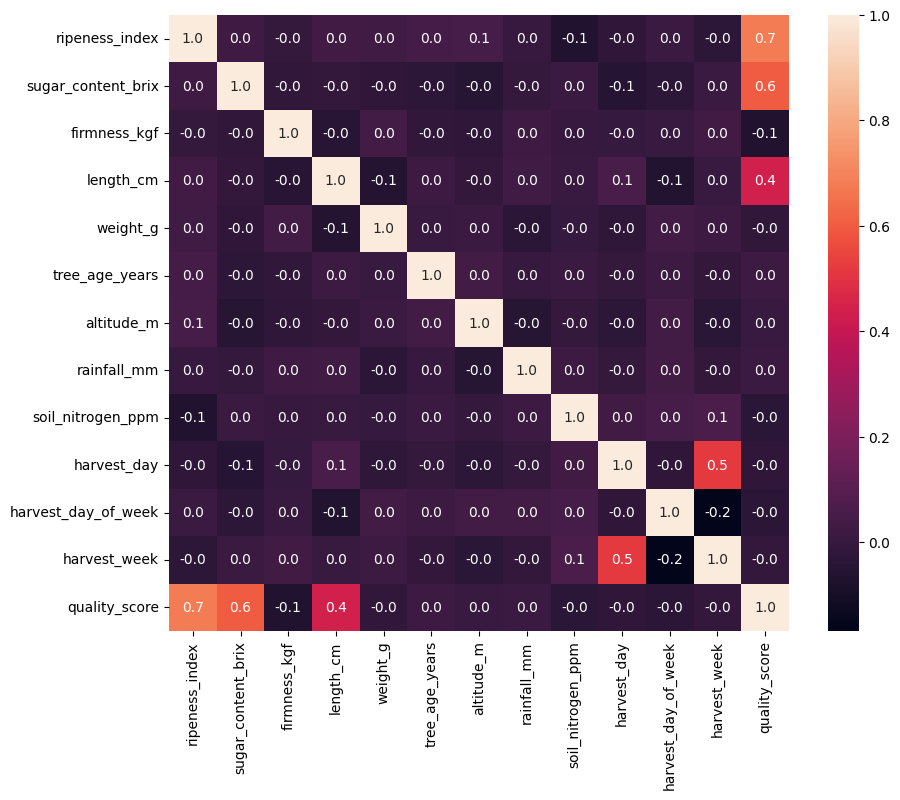

In [11]:
plt.figure(figsize=(10,8))
 
features = []
features = numeric_features
features.append(target)
 
sns.heatmap(data[features].corr(), annot=True, fmt=".1f")
plt.show()

Answer: Once again we can confirm that `ripeness_index`, `sugar_content_brix` and `length_cm` affect `quality_score` the most.

For each of the categoric features, group the values and generate their statistics (count, mean, std, min...). Display only the top value that has the highest mean score.

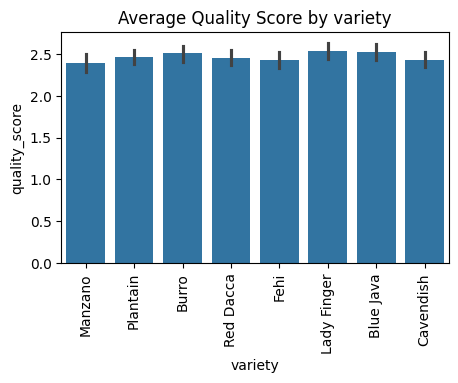

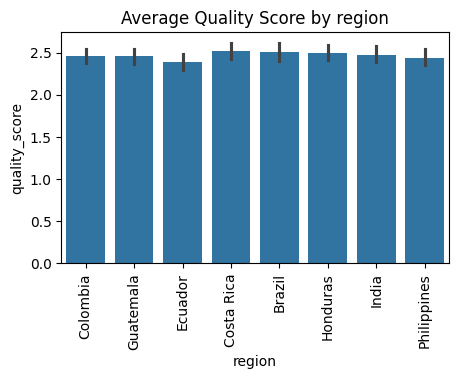

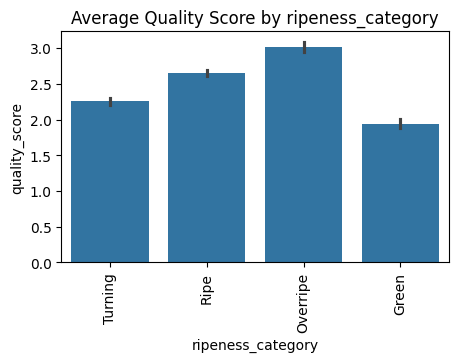

In [12]:
for feature in categoric_features:
    plt.figure(figsize=(5,3))
    sns.barplot(x=feature, y='quality_score', data=data, estimator='mean')
    plt.xticks(rotation=90)
    plt.title(f'Average Quality Score by {feature}')
    plt.show()

Create a bar plot for each categoric features, showing the average `quality_score` for each.

### Preparing for Machine Learning

Create a new variable `data_encoded` that consists of the main data, but all categoric features should be converted using one hot encoding. Make sure the generated values are `1` and `0` not `True` or `False`.

In [22]:
data_encoded = pd.get_dummies(data, dtype="int")

### Data Splitting

Create the usual `X_train`, `X_test`, `y_train` and `y_test` using the ratio of 70:30. Make sure to use the encoded dataset, and make sure not to include the target in the `X` dataset.

In [24]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop([target], axis=1)
Y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Fitting Models

Pick three different regression algorithms and fit them on the training dataset, and then predict on the test. Make sure to store all results of prediction in a separate variable.

In [32]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)

dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

### Evaluate Models

Print the `RMSE` and `R2` score for each model.

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor']
predictions = [lr_pred, dt_pred, rf_pred]

for model, prediction in zip(models, predictions):
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    r2 = r2_score(y_test, prediction)
    print(f"Model: {model} | Prediction - RMSE: {rmse:.2f} - R2: {r2:.2f} ")

Model: LinearRegression | Prediction - RMSE: 0.07 - R2: 0.98 
Model: DecisionTreeRegressor | Prediction - RMSE: 0.19 - R2: 0.87 
Model: RandomForestRegressor | Prediction - RMSE: 0.11 - R2: 0.96 


### Final Evaluation

Pick the best model, and check which features affect the outcome the most. This can be done as follows:
- Create a pandas DataFrame with two columns `Feature` and `Coefficients`. `Features` can be obtain from `X.columns` and `Coefficients` from the trained model `MODEL_NAME.coef_`.
- Sort the Dataframe by the coefficient in descending order ignoring whether it's positive or negative.
- Print the dataframe

Which are the top 3 features that affect the `quality_score`?

In [ ]:
df = pd.DataFrame({'Feature': X.columns,  'Coefficients': lr.coef_},columns=["Coefficients","Feature"]).sort_values(by='Coefficients', ascending=False, key=abs)
# When sorting, key=abs will ignore the negative sign
print(df)

    Coefficients                     Feature
0       0.195261              ripeness_index
1       0.156932          sugar_content_brix
3       0.039720                   length_cm
2      -0.015257                firmness_kgf
28     -0.010796     ripeness_category_Green
29      0.009851  ripeness_category_Overripe
22     -0.008637           region_Costa Rica
15      0.008115                variety_Fehi
30      0.007980      ripeness_category_Ripe
20      0.007839               region_Brazil
16     -0.007529         variety_Lady Finger
31     -0.007036   ripeness_category_Turning
21     -0.006421             region_Colombia
27      0.005478          region_Philippines
17      0.004875             variety_Manzano
12     -0.004311           variety_Blue Java
18     -0.003951            variety_Plantain
14      0.002412           variety_Cavendish
23      0.002288              region_Ecuador
13      0.002075               variety_Burro
19     -0.001687           variety_Red Dacca
24      0.

Answer: Based on this regression model, importance is as follows:

ripeness_index,
sugar_content_brix,
length_cm
